# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
display(data.columns)

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12, 111, 234]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,12579,11114,17569,805,6457,1519
2,15603,2703,3833,4260,325,2563


In [5]:
print "Sample points comparison with mean:"
display(samples - np.round(data.mean()))
print "Sample points comparison with median:"
display(samples - np.round(data.median()))
print "Sample points comparison with 1st quartile:"
display(samples - np.round(data.quantile(0.25)))
print "Sample points comparison with 3rd quartile:"
display(samples - np.round(data.quantile(0.75)))

Sample points comparison with mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,19714.0,6523.0,3806.0,-2785.0,1000.0,1406.0
1,579.0,5318.0,9618.0,-2267.0,3576.0,-6.0
2,3603.0,-3093.0,-4118.0,1188.0,-2556.0,1038.0


Sample points comparison with median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,23210.0,8692.0,7001.0,-1239.0,3065.0,1965.0
1,4075.0,7487.0,12813.0,-721.0,5641.0,553.0
2,7099.0,-924.0,-923.0,2734.0,-491.0,1597.0


Sample points comparison with 1st quartile:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,28586.0,10786.0,9604.0,-455.0,3624.0,2523.0
1,9451.0,9581.0,15416.0,63.0,6200.0,1111.0
2,12475.0,1170.0,1680.0,3518.0,68.0,2155.0


Sample points comparison with 3rd quartile:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14780.0,5129.0,1101.0,-3267.0,-41.0,1111.0
1,-4355.0,3924.0,6913.0,-2749.0,2535.0,-301.0
2,-1331.0,-4487.0,-6823.0,706.0,-3597.0,743.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
Sample 0's total purchases are above or below the 1st and 3rd quartiles for nearly all 6 categories. In particular Fresh and Milk products are very high, while frozen food is very low. This customer is probably a local quality Deli or Health/Vegetarian shop or restaurant.

Sample 1's purchases are similar with stronger purchases in Grocery, Milk and Detergents and less spending on Fresh products. Analysis against the 3rd quartile statistics show positive numbers for these categories while spending on Fresh and Frozen Food are far below, in particular Frozen food spendings are close the median. This indicates a larger focus on Retail, rather than local Deli.

Sample 2's low spending on Milk, Grocery and Detergents compared to high purchases on Frozen and Fresh Food can be observed when compared with median spending in each category. Delicatessen and Frozen spending are actually higher than the 3rd quartile and spending on Fresh products is the highest of all samples. This customer is likely a to be a local cafe or restaurant.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', axis=1)
labels = data['Delicatessen']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=16)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=16)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, y_pred)  

print "The score for prediction on Delicatessen is: {}".format(score)

The score for prediction on Delicatessen is: -0.418324371786


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I chose Delicatessen and the negative R2 score indicates that no prediction can be drawned for this label from the data available.

A feature that can't be predicted from the other features is important in understanding customer purchasing behaviour.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

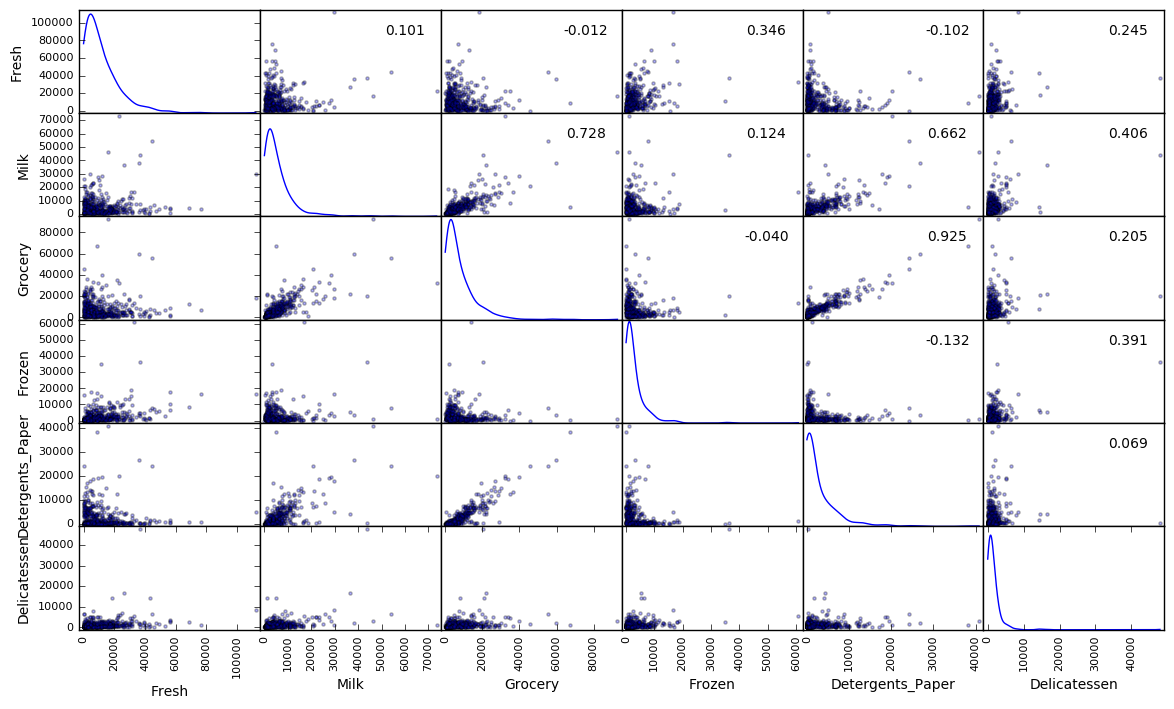

In [8]:
# Produce a scatter matrix for each pair of features in the data
# Adding Correlation figures to the plot
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [9]:
# Display Correlation Matrix
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** There seems to be some correlation between groceries and detergents paper (0.92 correlation), and also to a certain extent between Milk and Groceries (0.72). Most of the data points lie near the axis center. In the case of Delicatessen, no matter how spending increases it doesn't seem to influence spending on other categories of products. The distributions for each categories, as showns in the diagonal plots, are skewed. We cannot observe normal distributions which might have an effect on the Clustering algorithm. This is the reason why we will apply normalisation in the next data preprocessing step.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

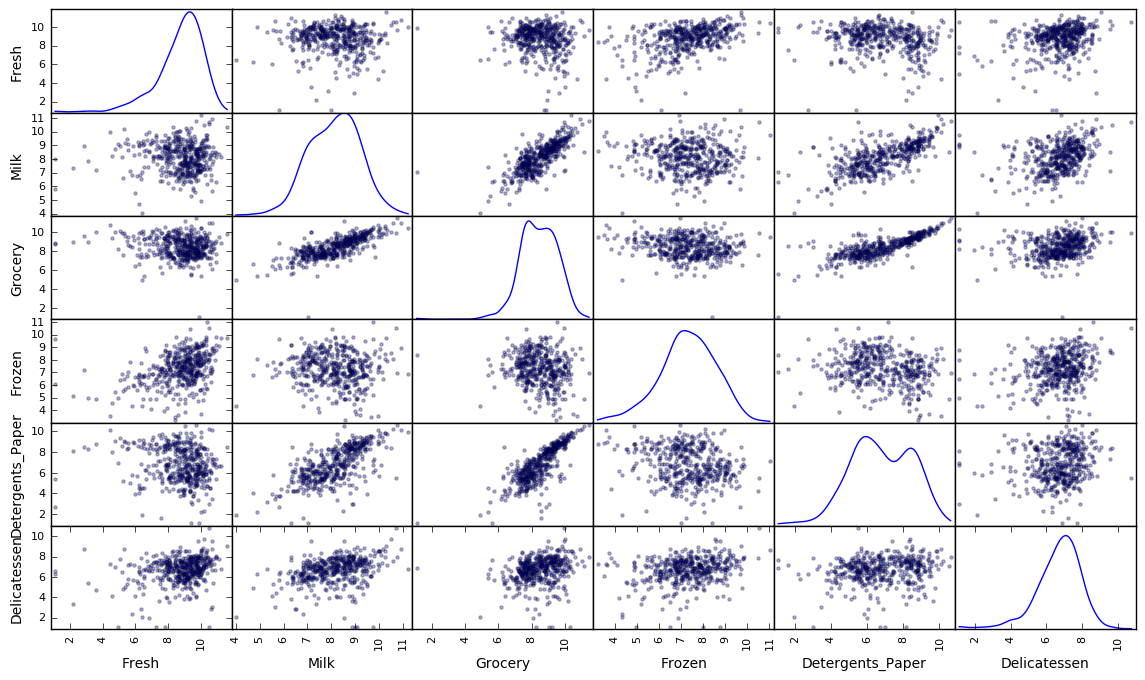

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,9.439784,9.315961,9.773891,6.690842,8.772920,7.325808
2,9.655218,7.902118,8.251403,8.357024,5.783825,7.848934


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
import collections
cnt = collections.Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    #display(outliers[feature])
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    for cust_id in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        cnt[cust_id] += 1
    
    print "Feature {} Index counter".format(feature)
    display(cnt.most_common(5))

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [75, 66, 128, 154, 65]
# Samples: [12, 111, 234]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Keep outliers
good_data = log_data

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Feature Fresh Index counter


[(96, 1), (65, 1), (66, 1), (355, 1), (357, 1)]

Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Feature Milk Index counter


[(96, 1), (65, 1), (66, 1), (355, 1), (356, 1)]

Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Feature Grocery Index counter


[(154, 2), (96, 1), (65, 1), (66, 1), (355, 1)]

Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Feature Frozen Index counter


[(154, 2), (65, 2), (128, 1), (193, 1), (264, 1)]

Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Feature Detergents_Paper Index counter


[(154, 2), (65, 2), (75, 2), (128, 1), (193, 1)]

Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Feature Delicatessen Index counter


[(154, 3), (128, 2), (65, 2), (66, 2), (75, 2)]

In [14]:
data.ix[outliers]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
66,9,1534,7417,175,3468,27
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8
65,85,20959,45828,36,24231,1423


As we can see above, all outliers selected have at least two categories with very little spending, far below the 1st quartile recorded in the data description

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** 5 outliers appear in more than one feature (same customer id), however only 154 appears in 3 features and none of them seems to have totals computed from erroneous data.

I have removed them as these might affect the clustering results, however we could also add them back at the end and run the analysis again for comparison.

PCA in particular might be affected by outliers as the algorithm uses variance in each feature. Since we're going to use feature transformation before clustering I think it's safer to remove them, outliers only represent 1% of the whole dataset.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


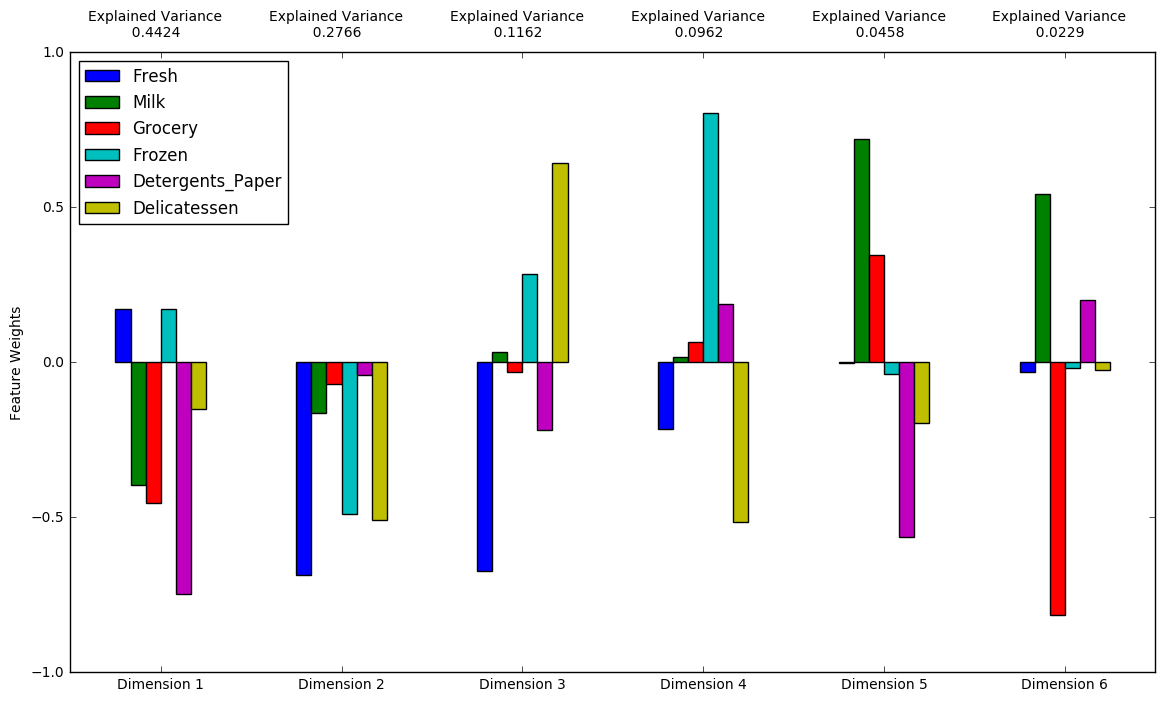

In [15]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

#print pca.explained_variance_ratio_

print pca_results['Explained Variance'].cumsum()

#print pca.components_

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** First two dimensions explains a variance of 0.71.90 (72%). First four components accounts for 93.14% of the variance.

In the first dimension, we can see significant negative weights on Detergents_Paper as well as on Milk and Grocery items, albeit to a lesser degree. These items are likely correlated during purchases so I am guessing that this dimension could be categorized as retail customers.

The second dimension shows important negative weights on Fresh, Frozen goods and Delicatessen. Again there's a strong correlation between these feature so this type of purchases together tend to highlight catering ans restauration types of business.

In the third dimension, we can observe two types of spending behaviours, purchases of milk and detergents paper or frozen food and delicatessen seem to be grouped. I see in this pattern casual buyers, probably individuals spending small amount each time they make a purchase.

Lastly, the fourth dimension has a large weigth on Frozen food and or Delicatessen and indicate customers that are less healthy conscious making targeted purchases on one type of product.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.2326,-1.3278,-1.0282,-1.9855,0.2291,0.1969
1,-2.6388,-0.8947,-0.6627,-0.4977,0.0994,-0.0588
2,1.0852,-1.6610,0.6585,-0.1619,0.0704,-0.2398


Visualizing the percent of variance explained

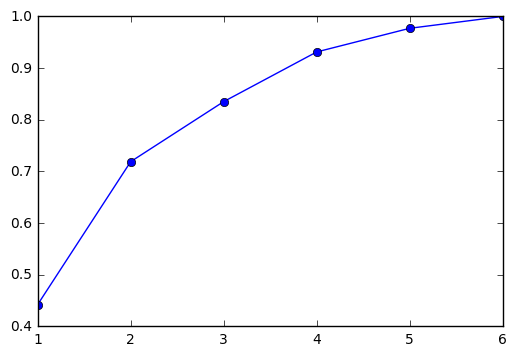

In [17]:
import matplotlib.pyplot as plt
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

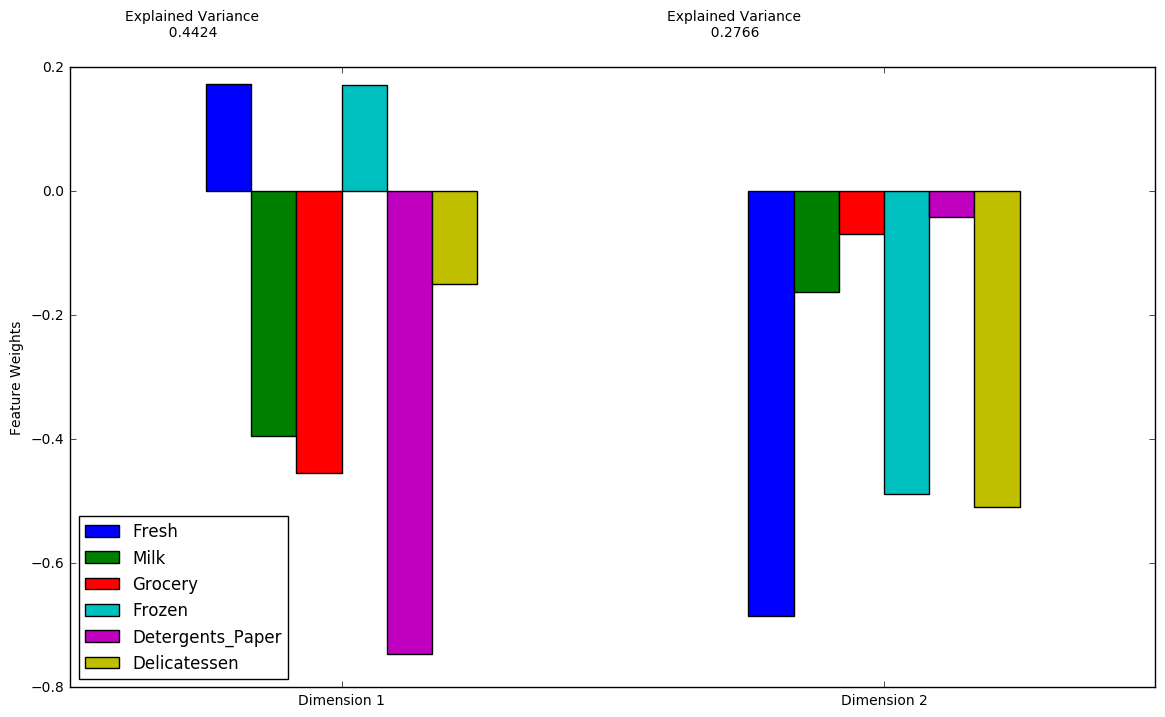

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.2326,-1.3278
1,-2.6388,-0.8947
2,1.0852,-1.6610


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

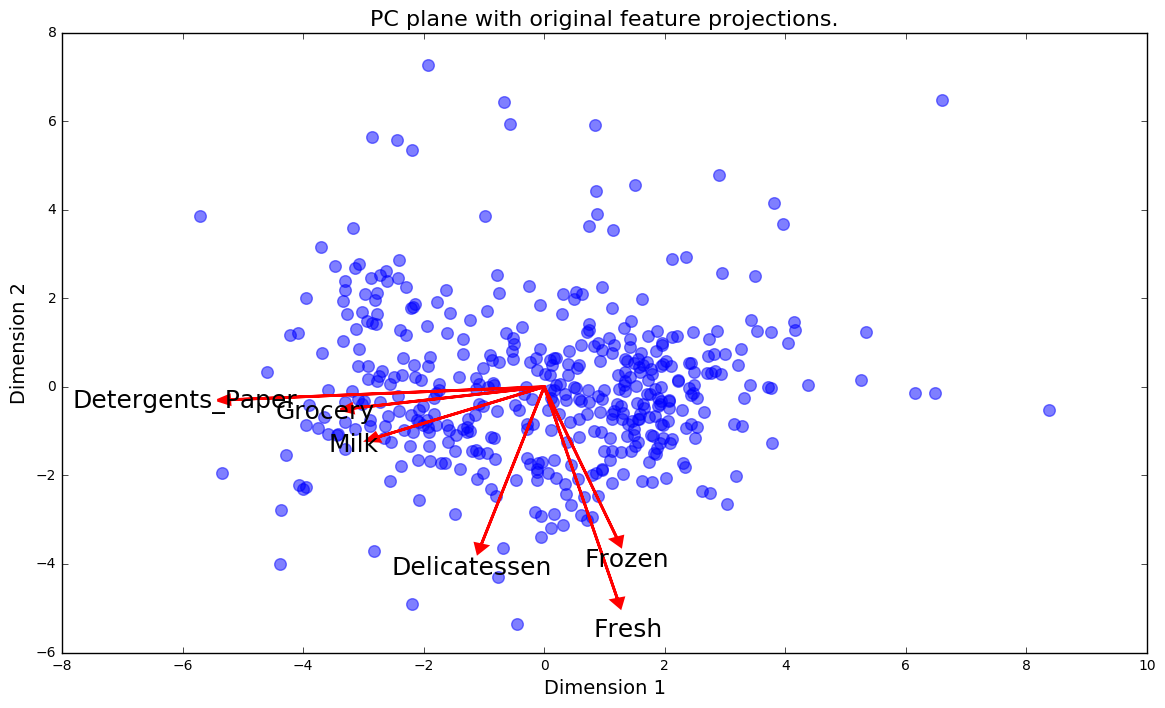

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

** Answer ** The biplot indicates that Frozen and Fresh Food categories are closely related to the First Component. Detergents Paper, Grocery and Milk are closely related to the second component.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-means clustering algorithm allows grouping of data by similarity. It is called a "hard" clustering algorithm because data points must fit to a cluster whereas a Gaussian Mixture Model gives probabilities about the covariance structure of the data. In other words, K-means defines clusters as circles with centroids while Gaussian Mixture Model can define various cluster shapes with probabilities for each types, thefore defines a mixture of models with various options.

I expect the Gaussian Mixture Model to perform better in our cases since we could not see clear delination betweens clusters in our customer data. A caveat when selecting GMM over K-means is scalability. We do not have a large number of data points in this project so Gaussian Mixture Model should be suitable.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

n_classes = len(np.unique(reduced_data))

for k in range(2, 6):
    gmm = GaussianMixture(n_components=k,
                          covariance_type="full")

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = gmm.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = gmm.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = gmm.means_
  
    print "\nCenters coordinates:\n {}".format(centers)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = gmm.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data, preds, metric='euclidean')

    print "\nSilhouette score for Cluster no={} is: {}".format(k, score)


Centers coordinates:
 [[ 1.16649267 -0.25812096]
 [-2.24401856  0.4965554 ]]

Silhouette score for Cluster no=2 is: 0.410366734627

Centers coordinates:
 [[ 0.94764602 -0.17181464]
 [-2.70426643  0.99596443]
 [ 0.44214907 -0.38763882]]

Silhouette score for Cluster no=3 is: 0.109866270312

Centers coordinates:
 [[ 1.33777283 -0.41013728]
 [ 0.61451883  0.74335353]
 [-1.65436821 -0.34023249]
 [-3.15055629  1.18808664]]

Silhouette score for Cluster no=4 is: 0.307750865463

Centers coordinates:
 [[-1.83901937 -0.94409946]
 [ 0.91026906  0.17765762]
 [ 0.53388904  0.66373117]
 [-3.01892331  1.24637645]
 [ 1.35790111 -1.05695717]]

Silhouette score for Cluster no=5 is: 0.183369357336


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 2 Clusters seems to work better with an R2 score over 0.42 indicating less overlapping between clusters.

When running a BIC score over all ranges of covariance types however, we find a different result, 3 spherical clusters would give a better result for GMM algorithm. I will go ahead and explore results found with 3 clusters, my intuition tells me that with a third cluster another interesting spending behaviour could emerge. I think in reality Customer groups are not simply binary.

In [22]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

print "Best GMM is {}".format(best_gmm)
print "\nLowest BIC score {}".format(lowest_bic)

Best GMM is GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=3, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

Lowest BIC score 3647.61876575


In [24]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Run the clusterer again with optimal parameters
gmm = GaussianMixture(n_components=3,
                      covariance_type="spherical")
clusterer = gmm.fit(reduced_data)
preds = gmm.predict(reduced_data)
centers = gmm.means_
sample_preds = gmm.predict(pca_samples)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

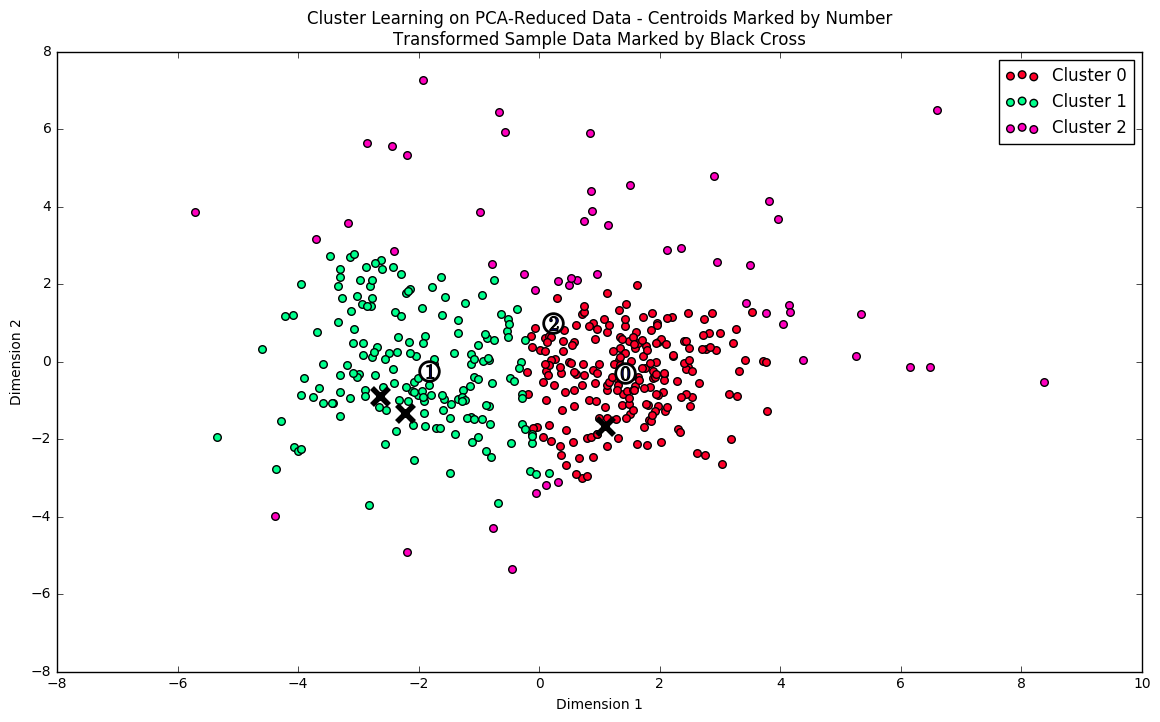

In [25]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9802.0,2016.0,2476.0,2204.0,310.0,742.0
Segment 1,5294.0,7175.0,10785.0,1214.0,3481.0,1161.0
Segment 2,3285.0,2621.0,3901.0,955.0,716.0,459.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

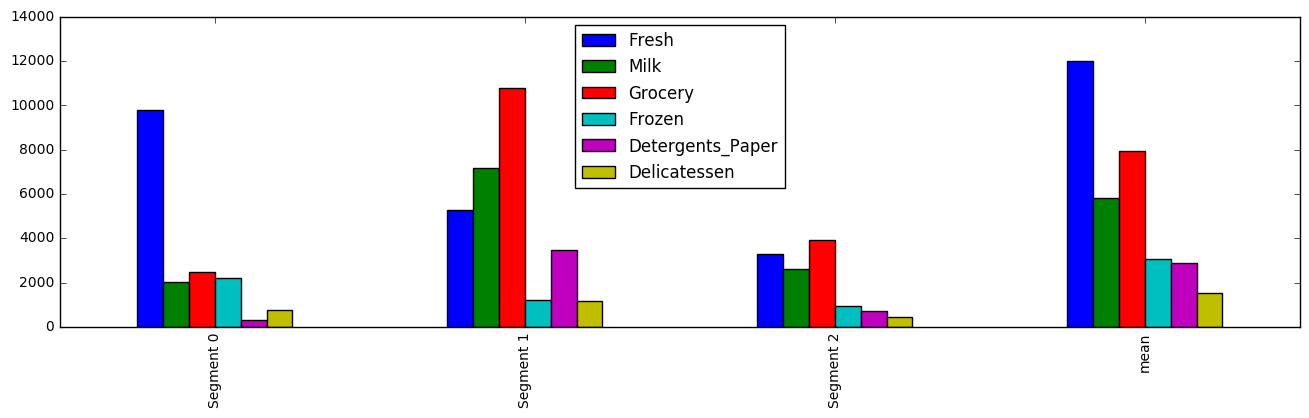

In [27]:
# Clusters centroids visualisation
true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

**Answer:** 
Sample 0 Represents total purchases that are close to median spendings in all categories, except for Grocery and Detergents which are below. Strongest categories are Fresh and Frozen food. This type of spending seem to match Restaurant and Cafe businesses.

Sample 1 has stronger purchases in Milk, Grocery and Detergents but less spending on Fresh products. Total purchases tend to be below average (median) spending in each category. I would classify this customer as retail.

Sample 2 categorizes customers who tend to spend lower than average, based on median figures available from the dataset statistics. This cluster groups casual/irregular customers.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
        
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "\nChosen samples of wholesale customers dataset:"
display(samples)

print "\nCluster Centers:"
display(true_centers)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,12579,11114,17569,805,6457,1519
2,15603,2703,3833,4260,325,2563



Cluster Centers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9802.000000,2016.000000,2476.000000,2204.000000,310.000000,742.000000
Segment 1,5294.000000,7175.000000,10785.000000,1214.000000,3481.000000,1161.000000
Segment 2,3285.000000,2621.000000,3901.000000,955.000000,716.000000,459.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


In [29]:
# Display probabilities of sample point in each Cluster
for i, j in enumerate(pca_samples):
    print "Probability of Sample {}: {}".format(i, clusterer.predict_proba([j])[0])

Probability of Sample 0: [ 0.00397025  0.90108779  0.09494196]
Probability of Sample 1: [ 0.00124797  0.91117554  0.08757648]
Probability of Sample 2: [ 0.84137675  0.06502738  0.09359587]


**Answer:** According to our predictions, Customer 234 (2) is assigned to Hotel/Restaurant (Cluster 0) while Customer 11 (0) & 22 (1) are assigned to Retail (Cluster 1). This is as per my descrption of the clusters in answer to Question 8.

If we compare the samples figures to cluster centers, we find pretty good matches with samples points. The cluster visualization shown above also confirm the prediction.

Cluster 0 has strong Fresh and Frozen sales

Cluster 1 has strong Milk, Grocery and Detergents sales

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** We can assume that daily deliveries affect customers ordering fresh products more than those spending larger sums on frozen food and detergents products. A change in the delivery service from 5 days a week to 3 days a week might affect some customers more than others. If we look at our 3 clusters, cluster 0 seems to group customers spending lower amounts; these might be irregular customers or those with smaller average baskets. Cluster 1 seems to group customers spending similar amounts as cluster 0 with more focus on Fresh products and forzen foods. Lastly, cluster 2 groups big spenders, specially on Milk and Grocery products. This last group indicates regular customers who potentially order many times per week. I would say that this group is likely to be more affected by a change in delivery service.

In order to verify this hyposthesis using A/B Testing, we will need to select 2 sub groups of customers in each segement (A/B), then make sure we run our test over a period of a week to ensure effect on their spending behaviour is reflected over a period which covers a full cycle of weekly deliveries. The goal is to measure and compare feedback between customers from each sub groups. Clusters will help ensure that we don't attempt to run this "control and variation technique" over an heterogeneous customer base, which might render our results inconclusive.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The 'customer segment' labels can be used as an additional input feature, which a supervised learner could train on and then make predictions for the new customers.

For example if we find a correlation between a customer segment and sensitivity to daily delivery schedules, we could flag this cluster using a binary output (0: indifferent, 1: sensitive) and make predictions about new or prospective customers to understand whether they'll need to be supported by special delivery service or not.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [30]:
# Debug: For some reason the channel result visualisation only works if I pass an empty list of outliers
#outliers  = [75, 66, 128, 154, 65]
outliers  = []

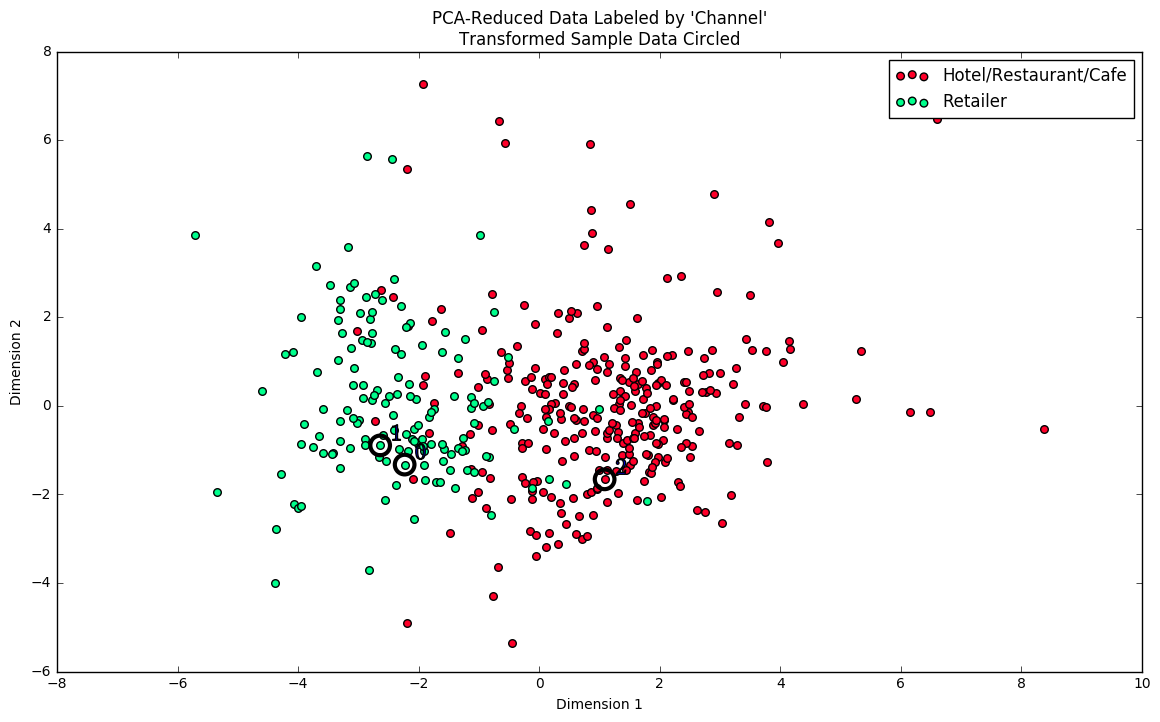

In [31]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** There's a fairly good match between the first 2 clusters found with a Gaussian Mixture Model and data split by retailer and "HoReCa". However while there's a clear separation between clusters found by the algorithm the overlap across PCA dimensions between Retailers and HoReCas is quite pronounced.

My initial classification based on Data Exploration in Question 1 is actually quite close to the channel classification feature. I think a more careful outliers analysis and elimination might produce very close results.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.